(999, 1)
          0
0 -0.304278
1 -0.298853
2 -0.339540
3  6.091681
4 -0.437188


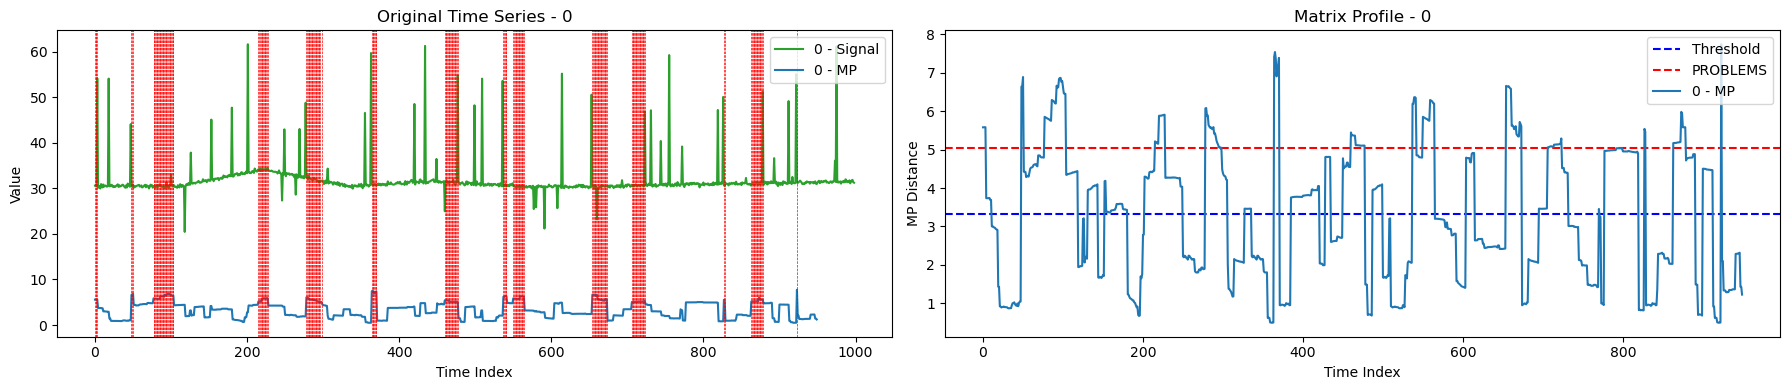

In [91]:
import numpy as np
import pandas as pd
import stumpy 
import matplotlib.pyplot as plt

df_np = np.load("../models/1.npy")
df = pd.DataFrame(df_np)

# normalize data
# data = (df - df.min()) / (df.max() - df.min())

data = (df - df.mean()) / df.std()

print(data.shape)
print(data.head())

# run for each feature

ranks = {}
matrix_profile_dists = {}

# for col in data.columns:
#     init_window = data[:30]
#     stream_data = data[30:]
#     stream = stumpy.stumpi(init_window, m= 20, egress=False)

#     for point in stream_data:
#         stream.update(point)

#     mp = np.array(stream.P_)
#     matrix_profile_dists[col] = mp

#     rank = pd.Series(mp).quantile(0.995) - pd.Series(mp).quantile(0.8)
#     ranks[col] = rank

# for col, mp in matrix_profile_dists.items():
#     plt.figure(figsize=(12, 4))
#     plt.plot(mp, label=f'{col} - Matrix Profile')
#     plt.axhline(np.nanpercentile(mp, 99.5), linestyle='--', color='red', label='Threshold')
#     plt.title(f'Matrix Profile (Streaming) - {col}')
#     plt.xlabel("Time Index")
#     plt.ylabel("MP Distance")
#     plt.legend()
#     plt.show()
for col in data.columns:
    m = 50
    feature = data[col]
    matrix_profile = stumpy.stump(feature, m, ignore_trivial=True)
    matrix_profile_dist = matrix_profile[:,0]
    df_matrix_profile_dist = pd.Series(matrix_profile_dist)
    #threshold/rank change if needed to std and mean 
    rank = df_matrix_profile_dist.quantile(0.995) - df_matrix_profile_dist.quantile(0.8)
    ranks[col] = rank
    matrix_profile_dists[col] = matrix_profile_dist

num_features = len(matrix_profile_dists)
fig, axes = plt.subplots(num_features, 2, figsize=(18, 4 * num_features), sharex='col')

# Normalize axes to always be 2D
if num_features == 1:
    axes = np.array(axes).reshape(1, 2)

for i, (col, mp_dist) in enumerate(matrix_profile_dists.items()):
    original_signal = df[col].values

    axes[i, 0].plot(original_signal, color='tab:green', label=f"{col} - Signal")
    axes[i, 0].plot(mp_dist, color='tab:blue', label=f"{col} - MP")
    axes[i, 0].set_title(f"Original Time Series - {col}")
    axes[i, 0].set_ylabel("Value")
    axes[i, 0].legend()

    mask = np.where(matrix_profile_dists[0] > np.mean(matrix_profile_dists[0]) + np.std(np.array(matrix_profile_dists[0])))[0]


    for value in mask:
        axes[i, 0].axvline(x=value, color='red', linestyle='--', linewidth=0.5)


    axes[i, 1].axhline(y=np.mean(matrix_profile_dists[0]), color='blue', linestyle='--', label='Threshold')
    axes[i, 1].axhline(y=np.mean(matrix_profile_dists[0]) + np.std(np.array(matrix_profile_dists[0])), color='red', linestyle='--', label='PROBLEMS')


    axes[i, 1].plot(mp_dist, color='tab:blue', label=f"{col} - MP")
    axes[i, 1].set_title(f"Matrix Profile - {col}")
    axes[i, 1].set_ylabel("MP Distance")
    axes[i, 1].legend()

axes[-1, 0].set_xlabel("Time Index")
axes[-1, 1].set_xlabel("Time Index")
plt.tight_layout()
plt.show()

In [69]:
np.mean(matrix_profile_dists[0]) + np.std(np.array(matrix_profile_dists[0]))

mparray(5.0466310392624205, dtype=object)

In [90]:
mask = np.where(matrix_profile_dists[0] > np.mean(matrix_profile_dists[0]) + np.std(np.array(matrix_profile_dists[0])))
# matrix_profile_dists[0][mask]

mask[0].shape

(169,)

In [52]:
df_np

array([30.61, 30.63, 30.48, 54.19, 30.12, 30.41, 30.51, 29.97, 30.93,
       30.83, 30.21, 30.84, 30.39, 30.56, 30.62, 30.42, 30.39, 30.64,
       54.1 , 30.45, 30.76, 30.46, 30.8 , 30.58, 30.28, 30.52, 30.33,
       30.35, 30.61, 30.75, 30.89, 30.32, 30.7 , 30.41, 30.54, 30.56,
       30.8 , 30.78, 30.53, 30.28, 30.14, 30.67, 30.19, 31.06, 30.74,
       30.54, 30.36, 44.1 , 30.51, 30.38, 30.89, 30.14, 30.47, 30.35,
       30.47, 30.58, 30.62, 30.74, 30.76, 30.4 , 30.45, 30.65, 30.2 ,
       30.31, 30.47, 30.67, 30.79, 30.24, 30.69, 30.46, 30.51, 29.98,
       30.33, 30.81, 30.67, 30.7 , 30.15, 30.49, 30.39, 30.15, 30.46,
       30.67, 30.28, 30.49, 30.42, 30.89, 30.88, 30.39, 30.33, 30.34,
       30.41, 30.34, 30.1 , 30.61, 31.38, 30.22, 30.51, 30.11, 30.58,
       30.99, 32.99, 30.76, 30.41, 30.52, 30.69, 30.33, 30.33, 30.27,
       30.13, 30.69, 30.36, 30.21, 30.92, 30.7 , 30.3 , 30.74, 30.6 ,
       30.49, 20.45, 30.31, 30.87, 30.96, 30.75, 31.18, 30.82, 30.81,
       37.85, 31.12,